# Colab configuration

Mount your google drive to access the files stored.

In [ ]:
%cd /content/drive/MyDrive/your_path/sqlite3-notes
%ll

[Errno 2] No such file or directory: '/content/drive/MyDrive/your_path/sqlite3-notes'
/content
total 8
drwx------ 4 root 4096 Nov 30 23:24 drive/
drwxr-xr-x 1 root 4096 Nov 13 17:33 sample_data/


Or download the file directly from github

In [1]:
!curl -O https://raw.githubusercontent.com/G0erman/sqlite3-notes/main/sqlite3.po

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 79525  100 79525    0     0   251k      0 --:--:-- --:--:-- --:--:--  251k


# Exploration

In [2]:
!tail sqlite3.po -n 30

msgstr ""
"Versiones antiguas de SQLite tienen problemas compartiendo conexiones entre "
"hilos. Es por ello que el módulo de Python no permite compartir conexiones y "
"cursores entre hilos. Si se quiere intentar esto, se obtendrá una excepción "
"en tiempo de ejecución."

#: ../Doc/library/sqlite3.rst:1104
msgid ""
"The only exception is calling the :meth:`~Connection.interrupt` method, "
"which only makes sense to call from a different thread."
msgstr ""
"La única excepción es llamando el método :meth:`~Connection.interrupt`, el "
"cual solamente tiene sentido llamarlo desde un hilo diferente."

#: ../Doc/library/sqlite3.rst:1108
msgid "Footnotes"
msgstr "Notas al pie"

#: ../Doc/library/sqlite3.rst:1109
msgid ""
"The sqlite3 module is not built with loadable extension support by default, "
"because some platforms (notably Mac OS X) have SQLite libraries which are "
"compiled without this feature. To get loadable extension support, you must "
"pass --enable-loadable-sqlite-extension

The file contains the below structure:

* `#: ..(library):line_number`
* `msgid` Original text in English.
* `msgstr` Translated text to Spanish.

To do: find a regular expression tha parse this structure.

# Libraries

In [3]:
!pip install polib

In [24]:
# Utils
import re 
from collections import Counter
import matplotlib.pyplot as plt

# Handly polib
import polib

# Natural Language Processing
import nltk
nltk.download('stopwords')
nltk.download('punkt') # sentence tokenizer
nltk.download('wordnet') # Used for lemmatization

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


## Read Data

In [5]:
po = polib.pofile('sqlite3.po')
valid_entries = [entry for entry in po if not entry.obsolete]

In [6]:
english_text = [entry.msgid for entry in valid_entries]
spanish_text = [entry.msgstr for entry in valid_entries]

# Text Processing

In [7]:
english_text[:5]

[':mod:`sqlite3` --- DB-API 2.0 interface for SQLite databases',
 '**Source code:** :source:`Lib/sqlite3/`',
 "SQLite is a C library that provides a lightweight disk-based database that doesn't require a separate server process and allows accessing the database using a nonstandard variant of the SQL query language. Some applications can use SQLite for internal data storage.  It's also possible to prototype an application using SQLite and then port the code to a larger database such as PostgreSQL or Oracle.",
 'The sqlite3 module was written by Gerhard Häring.  It provides a SQL interface compliant with the DB-API 2.0 specification described by :pep:`249`.',
 'To use the module, you must first create a :class:`Connection` object that represents the database.  Here the data will be stored in the :file:`example.db` file::']

## Basic statistics

See words frecuency.

In [8]:
# Split sentences in words
all_text = [nltk.word_tokenize(sentence) for sentence in english_text]

In [9]:
all_text[:2]

[[':',
  'mod',
  ':',
  '`sqlite3`',
  '--',
  '-',
  'DB-API',
  '2.0',
  'interface',
  'for',
  'SQLite',
  'databases'],
 ['**Source', 'code', ':', '**', ':', 'source', ':', '`Lib/sqlite3/`']]

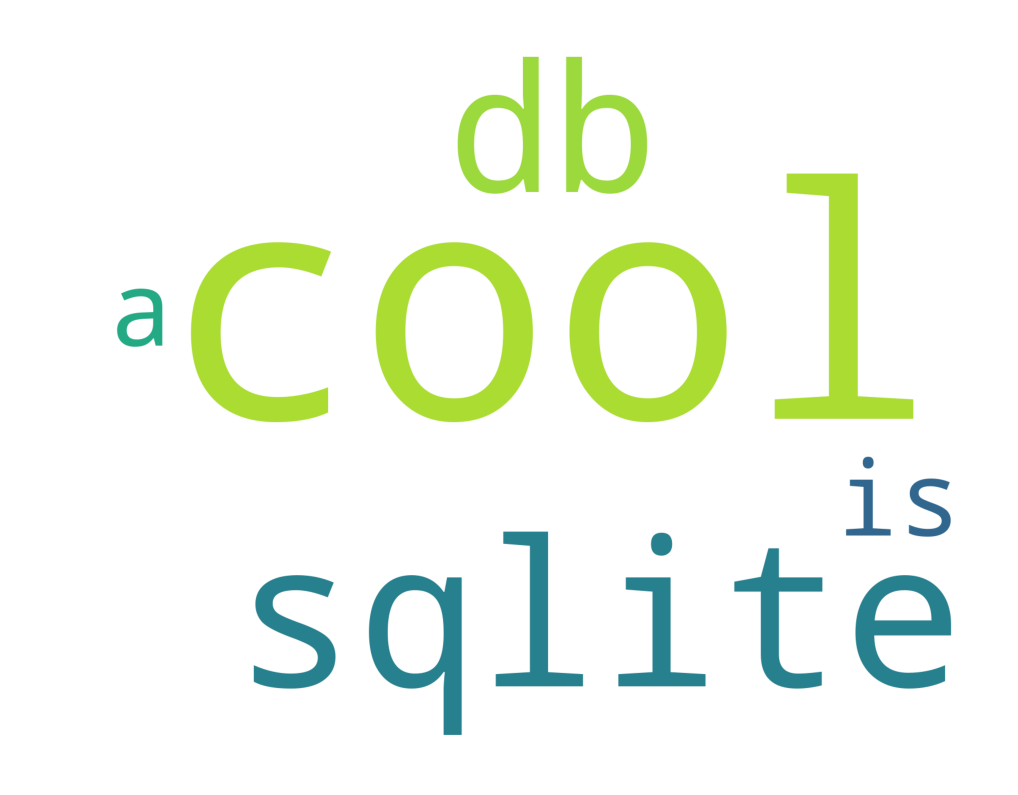

In [10]:
# Utils

def clean_word(x):
  """Delete not alphabetic caracteres."""
  word = re.sub(r'\W+', r' ', x.lower()).strip()
  word = re.sub(r'\d+', r' ', word).strip()
  #print(word)
  if (not word) or (len(word) < 3):
    return None
  else:
    return word

def test_clean_word():
  assert(clean_word(':') == None)
  assert(clean_word('Interface') == 'interface')
  assert(clean_word('DB-API') == 'db api')
  assert(clean_word('5') == None)
  assert(clean_word(' ti') == None)

test_clean_word()

##############################################################

def print_wordcloud(x):
  """Prints a default wordcloud.
  
  Args:
    x: dictionary of words
  """
  W = WordCloud(
      width = 1800,
      height = 1400,
      mode = 'RGBA',
      background_color = 'white',
      max_words = 2800
  ).fit_words(x)

  plt.figure(figsize=(18,15))
  plt.imshow(W)
  plt.axis('off')

print_wordcloud({'sqlite':8, 'is':1, 'a':1, 'cool':31, 'db':6})

### All Words

In [11]:
all_txt_clean = [clean_word(word) for sentence in all_text for word in sentence]
all_txt_clean = [word for word in all_txt_clean if word]
print(f'Total words: {len(all_txt_clean)}')
print(f'Unique words: {len(set(all_txt_clean))}')

Total words: 3884
Unique words: 939


In [12]:
result = Counter(all_txt_clean)
result.most_common(15)

[('the', 370),
 ('sqlite', 85),
 ('and', 70),
 ('you', 70),
 ('for', 60),
 ('this', 60),
 ('class', 55),
 ('database', 54),
 ('that', 49),
 ('can', 41),
 ('will', 39),
 ('with', 31),
 ('cursor', 30),
 ('sql', 29),
 ('module', 29)]

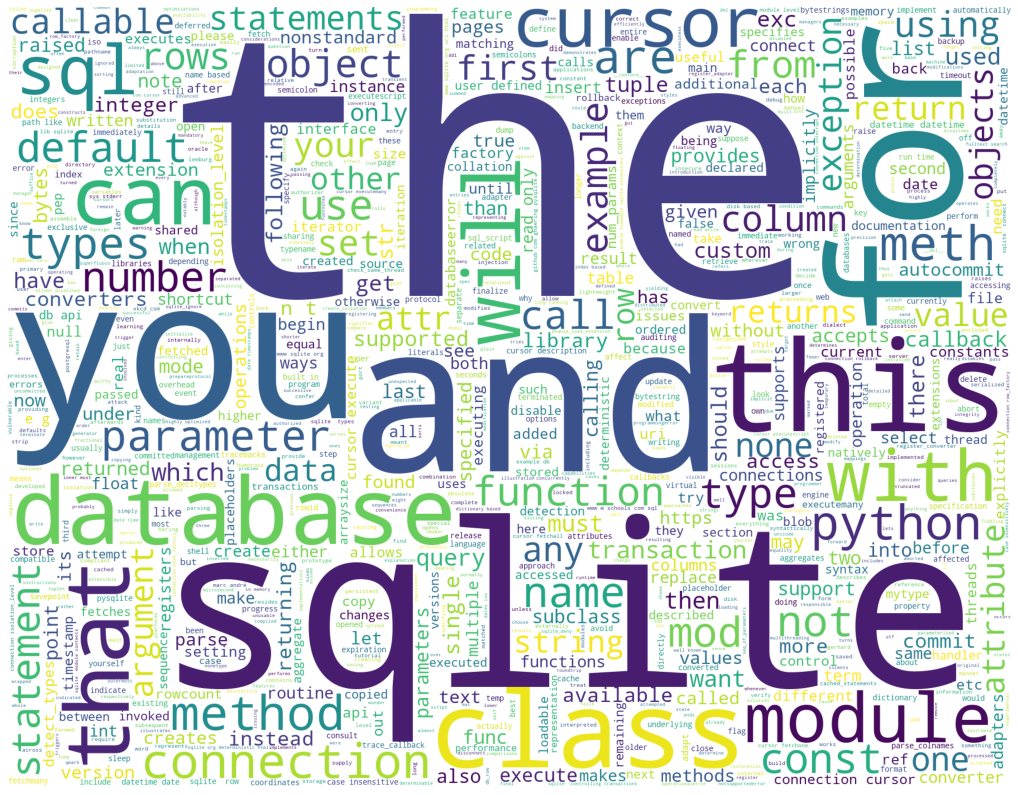

In [13]:
print_wordcloud(result)

### Without stopwords

In [14]:
en_stopword = stopwords.words('english')
all_txt_clean = [word for word in all_txt_clean if word not in en_stopword]
print(f'Total words: {len(all_txt_clean)}')
print(f'Unique words: {len(set(all_txt_clean))}')

Total words: 2747
Unique words: 866


In [15]:
result = Counter(all_txt_clean)
result.most_common(15)

[('sqlite', 85),
 ('class', 55),
 ('database', 54),
 ('cursor', 30),
 ('sql', 29),
 ('module', 29),
 ('connection', 29),
 ('meth', 29),
 ('method', 29),
 ('python', 28),
 ('types', 24),
 ('name', 23),
 ('parameter', 23),
 ('mod', 22),
 ('use', 22)]

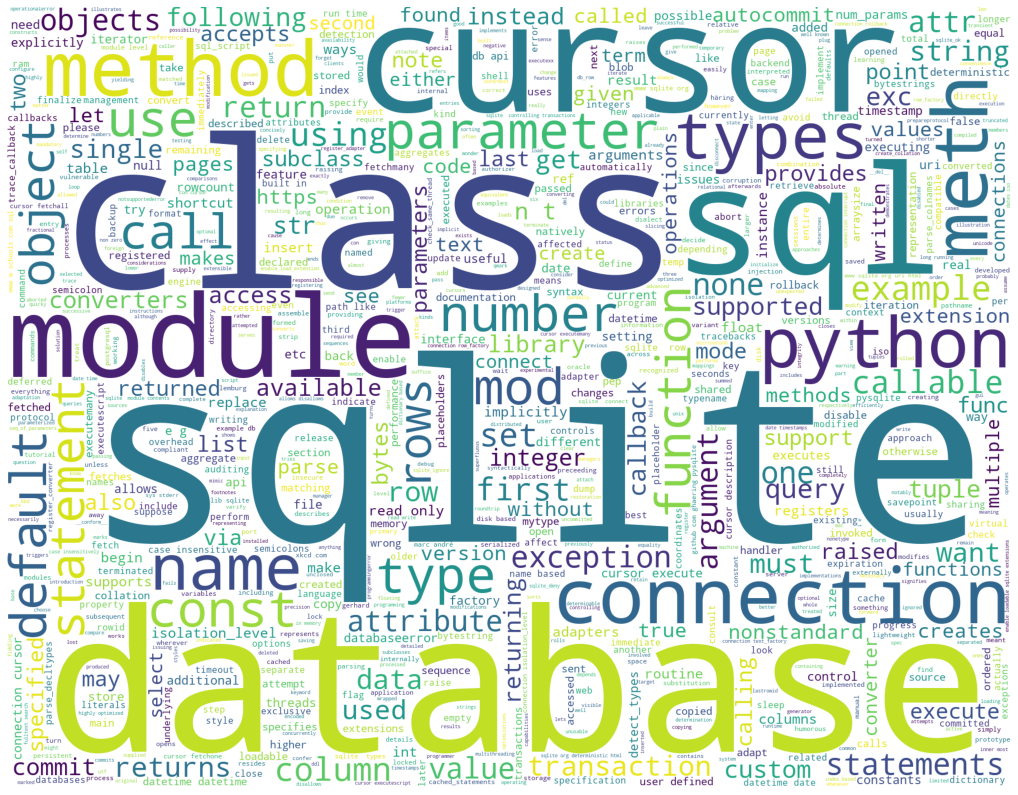

In [16]:
print_wordcloud(result)

### With lemmatization

In [31]:
# Remove lemmas
get_lemma = WordNetLemmatizer().lemmatize
get_lemma('leaves')

'leaf'

In [32]:
en_stopword = stopwords.words('english')
all_txt_clean = [get_lemma(word) for word in all_txt_clean 
                 if word not in en_stopword]
print(f'Total words: {len(all_txt_clean)}')
print(f'Unique words: {len(set(all_txt_clean))}')

Total words: 2747
Unique words: 787


In [33]:
result = Counter(all_txt_clean)
result.most_common(15)

[('sqlite', 85),
 ('database', 56),
 ('class', 55),
 ('type', 46),
 ('method', 35),
 ('connection', 34),
 ('statement', 34),
 ('object', 32),
 ('cursor', 31),
 ('module', 30),
 ('parameter', 30),
 ('row', 30),
 ('sql', 29),
 ('meth', 29),
 ('python', 28)]

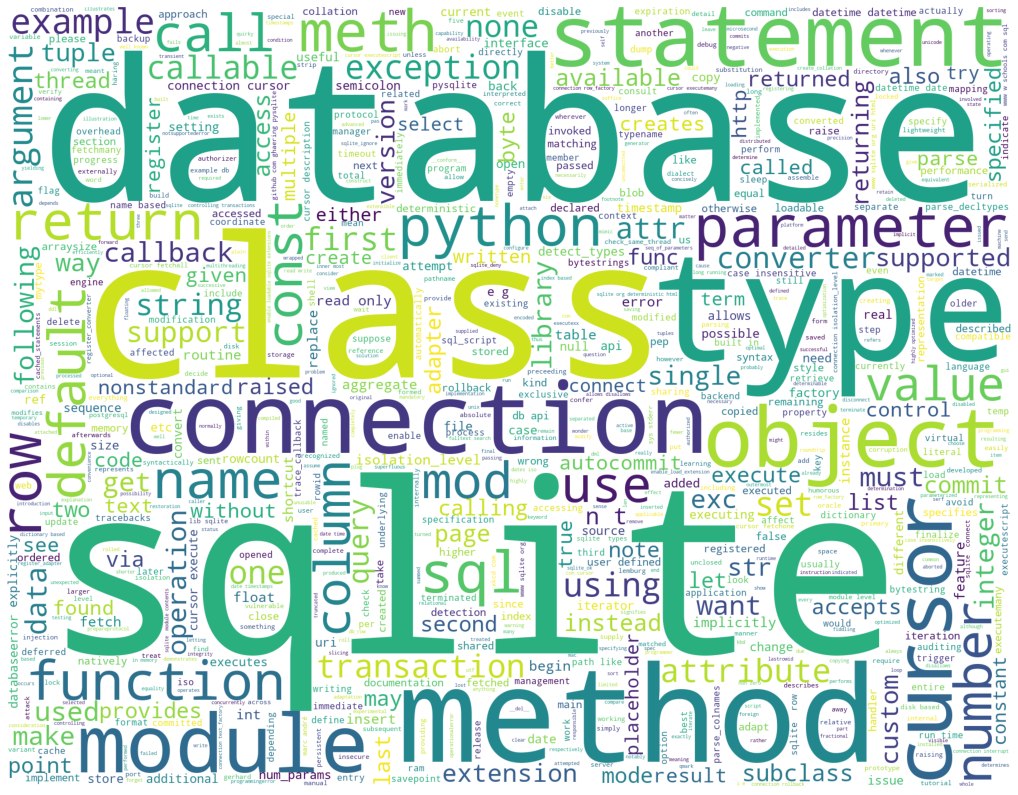

In [34]:
print_wordcloud(result)

**Conclussion**:

* There are significative changes in the top words, and there are less unique words.

# To do:

* TF-IDF
* Advance Statistics

In [ ]:
def catch_reference(x):
  """Catch objects :mod:`sqlite3`, This could be references to: 
  modules, libraries, clases, etc.

  parameters:
    x: all text to parse

  returns:
    ref: object's dictionary 
  """
  ref = re.sub(r':(mod):`(sqlite3)`(.*)', r'{"\1":["\2"]}', x)
  print(ref)
  return ref

def test_catch_reference():
  assert catch_reference(':mod:`sqlite3` --- DB-API 2.0 int... databases') == \
  'mod,sqlite3'

test_catch_reference()  